# Georgetown University 
## Data Science Certificate Program - Spring 2017
## Panama Papers - Capstone Project
### Team Members - Anders Pedersen, Abiy Kifle, Chris Marokov, Niraj Sheth

The Panama Papers was an investigation pursued by the International Consortium of Investigative Journalism (ICIJ) in 2016 based on 11.5m leaked files from the database of the world’s fourth biggest offshore law firm, Mossack Fonseca based in Panama. While Mossack Fonseca accounts for large portions of the Panama Paper data, leaks from offshore service providers Portcullis Trustnet (now Portcullis) and Commonwealth Trust Limited accounted for a third of the overall data[1].

The investigation was co-produced with more than 100 journalists and spurred national government investigations in dozens of countries while sparking a global debate on the need for beneficial ownership regulation.  
As part of the investigation more than 500,000 offshore companies we gathered into a database and linked with previous investigations named Offshore Leaks and Bahamas Leaks. The database is being made available by ICIJ under an open database license and is therefore free to use without restrictions. 

## Data Source

The Panama Papers data is comprised of five csv data sets from ICIJ that includes entities, intermediaries, officers, addresse, and all edges.

1. Entities.csv
2. Intermediaries.csv
3. Officers.csv
4. Addresses.csv
5. All_Edges.csv

## Key Data Elements

* Entity: A company, trust or fund created in a low-tax, offshore jurisdiction by an agent.
* Agent (registered agent or offshore service provider): Firm that provides services in an offshore jurisdiction to incorporate, register and manage an offshore entity at the request of a client.
* Officer: A person or company who plays a role in an offshore entity.
* Intermediary: A go-between for someone seeking an offshore corporation and an offshore service provider -- usually a law-firm or a middleman that asks an offshore service provider to create an offshore firm for a client.
* Address: Contact postal address as it appears in the original databases obtained by ICIJ.

For additional description of data elements, refer to https://offshoreleaks.icij.org/pages/about#terms_definition

### Analysis Approach

1. Clustering
2. Network graph analysis using networkx


#### Reference:
[1] https://offshoreleaks.icij.org/pages/about
[2] https://panamapapers.icij.org/#_ga=2.247812999.125016791.1498517622-1457334535.1496192192




## Clustering

## Graph Analysis using Networkx

In this section, we're attempting to create a visual representation of the Panama Papers. This representation is intended to be shown as a graph using the capabilities of networkx.

In [1]:
#Import necessary python libraries

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### The team uploaded the ICIJ data set in a Microsoft Azure for efficient use of storage space. Pandas library is used to read the csv files.

In [3]:
a = pd.read_csv("https://panamadata.blob.core.windows.net/icij/all_edges.csv")
e = pd.read_csv("https://panamadata.blob.core.windows.net/icij/Entities.csv")
i = pd.read_csv("https://panamadata.blob.core.windows.net/icij/Intermediaries.csv")
o = pd.read_csv("https://panamadata.blob.core.windows.net/icij/Officers.csv")
ad = pd.read_csv("https://panamadata.blob.core.windows.net/icij/Addresses.csv")

#### Review content from each dataset

In [4]:
# All Edges
a.head(3)

,node_1,rel_type,node_2,sourceID,valid_until,start_date,end_date
0,11000001,intermediary of,10208879,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
1,11000001,intermediary of,10198662,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
2,11000001,intermediary of,10159927,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN


In [5]:
# Entities
e.head(3)

,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,...,dorm_date,status,service_provider,ibcRUC,country_codes,countries,note,valid_until,node_id,sourceID
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,...,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers
1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,...,NaN,Defaulted,Mossack Fonseca,25249,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000002,Panama Papers
2,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,...,NaN,Defaulted,Mossack Fonseca,24138,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000003,Panama Papers


In [6]:
#Intermediaries
i.head(3)

,name,internal_id,address,valid_until,country_codes,countries,status,node_id,sourceID,note
0,"MICHAEL PAPAGEORGE, MR.",10001,MICHAEL PAPAGEORGE; MR. 106 NICHOLSON STREET B...,The Panama Papers data is current through 2015,ZAF,South Africa,ACTIVE,11000001,Panama Papers,NaN
1,CORFIDUCIA ANSTALT,10004,NaN,The Panama Papers data is current through 2015,LIE,Liechtenstein,ACTIVE,11000002,Panama Papers,NaN
2,"DAVID, RONALD",10014,NaN,The Panama Papers data is current through 2015,MCO,Monaco,SUSPENDED,11000003,Panama Papers,NaN


In [7]:
#Officers
o.head(3)

,name,icij_id,valid_until,country_codes,countries,node_id,sourceID,note
0,KIM SOO IN,E72326DEA50F1A9C2876E112AAEB42BC,The Panama Papers data is current through 2015,KOR,South Korea,12000001,Panama Papers,NaN
1,Tian Yuan,58287E0FD37852000D9D5AB8B27A2581,The Panama Papers data is current through 2015,CHN,China,12000002,Panama Papers,NaN
2,GREGORY JOHN SOLOMON,F476011509FD5C2EF98E9B1D74913CCE,The Panama Papers data is current through 2015,AUS,Australia,12000003,Panama Papers,NaN


In [8]:
#Addresses
ad.head(3)

,address,icij_id,valid_until,country_codes,countries,node_id,sourceID,note
0,-\t27 ROSEWOOD DRIVE #16-19 SINGAPORE 737920,6991059DFFB057DF310B9BF31CC4A0E6,The Panama Papers data is current through 2015,SGP,Singapore,14000001,Panama Papers,NaN
1,"""Almaly Village"" v.5, Almaty Kazakhstan",C65A269424AA1A8BBAC416FA30150938,The Panama Papers data is current through 2015,KAZ,Kazakhstan,14000002,Panama Papers,NaN
2,"""Cantonia"" South Road St Georges Hill Weybridg...",240EE44DFB70AF775E6CD02AF8CB889B,The Panama Papers data is current through 2015,GBR,United Kingdom,14000003,Panama Papers,NaN


#### Create dataframes for each of the datasets

In [10]:
pp_edge = pd.DataFrame(a)
pp_entity = pd.DataFrame(e)
pp_intermediary = pd.DataFrame(i)
pp_officer = pd.DataFrame(o)
pp_address = pd.DataFrame(ad)

In [11]:
# Use pandas groupby() frunction to determine loactions with the highest incorporation rates
# Here we're counting how many entities there are per jurisdiction

shell_locations = pp_entity.groupby(['jurisdiction_description'])["name"].count().reset_index(name="Entity Count")
shell_locations

,jurisdiction_description,Entity Count
0,Bahamas,191833
1,Belize,130
2,Bermuda,6
3,British Anguilla,3253
4,British Virgin Islands,151585
5,Brunei,2
6,Cayman,668
7,China,1
8,Cook Islands,2638
9,Costa Rica,78


In [10]:
#test = pd.merge(pp_entity,pp_intermediary, how='left', on='internal_id')
pp_entity[pp_entity['node_id'] == 10000001]
#pp_entity['name'].count()

,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,...,dorm_date,status,service_provider,ibcRUC,country_codes,countries,note,valid_until,node_id,sourceID
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,...,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers


In [11]:
#pp_intermediary[pp_intermediary['internal_id'] == 1001256]
pp_edge[pp_edge['node_2'] == 10000001]


,node_1,rel_type,node_2,sourceID,valid_until,start_date,end_date
43690,11001746,intermediary of,10000001,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
689951,12160432,shareholder of,10000001,Panama Papers,The Panama Papers data is current through 2015,23-MAR-2006,NaN
755358,12203574,shareholder of,10000001,Panama Papers,The Panama Papers data is current through 2015,23-MAR-2006,NaN


In [12]:
pp_edge_2 = pp_edge[pp_edge['rel_type'] == "intermediary of"]

In [13]:
pp_edge_2.head(3)

,node_1,rel_type,node_2,sourceID,valid_until,start_date,end_date
0,11000001,intermediary of,10208879,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
1,11000001,intermediary of,10198662,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
2,11000001,intermediary of,10159927,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN


In [14]:
test_1 = pd.merge(pp_entity,pp_edge_2, how='inner', left_on='node_id',right_on = 'node_2')
test_1.head(3)

,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,...,valid_until_x,node_id,sourceID_x,node_1,rel_type,node_2,sourceID_y,valid_until_y,start_date,end_date
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,...,The Panama Papers data is current through 2015,10000001,Panama Papers,11001746,intermediary of,10000001,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,...,The Panama Papers data is current through 2015,10000002,Panama Papers,11001746,intermediary of,10000002,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
2,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,...,The Panama Papers data is current through 2015,10000003,Panama Papers,11001746,intermediary of,10000003,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN


In [15]:
test_2 = pd.merge(test_1,pp_intermediary, how='inner', left_on='node_1',right_on = 'node_id')
test_2.head(3)

,name_x,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address_x,internal_id_x,incorporation_date,inactivation_date,...,name_y,internal_id_y,address_y,valid_until,country_codes_y,countries_y,status_y,node_id_y,sourceID,note_y
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,...,ORION HOUSE SERVICES (HK) LIMITED,11987,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,The Panama Papers data is current through 2015,HKG,Hong Kong,ACTIVE,11001746,Panama Papers,NaN
1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,...,ORION HOUSE SERVICES (HK) LIMITED,11987,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,The Panama Papers data is current through 2015,HKG,Hong Kong,ACTIVE,11001746,Panama Papers,NaN
2,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,...,ORION HOUSE SERVICES (HK) LIMITED,11987,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,The Panama Papers data is current through 2015,HKG,Hong Kong,ACTIVE,11001746,Panama Papers,NaN


In [16]:
import collections
new_dict = {'name': test_2['name_x'],
            'jurisdiction_description': test_2['jurisdiction_description'],
            'address': test_2['address_x'],
            'intermediary_name': test_2['name_y'],
            'country_code': test_2['country_codes_y'],
            'country': test_2['countries_y'],
            'status': test_2['status_y']
           }
name_dict = test_2['name_x']
jurisdiction_dict = test_2['jurisdiction_description']
address_dict = test_2['address_x']
intermediary_dict = test_2['name_y']
code_dict = test_2['country_codes_y']
country_dict = test_2['countries_y']
status_dict = test_2['status_y']
new_dict = collections.OrderedDict(new_dict)
#new_dict

In [17]:
#new_dict = {k:v for k,v in new_dict.items() if v is not None}
#name_dict = {k:v for k,v in name_dict.items() if v is not None}
#jurisdiction_dict = {k:v for k,v in jurisdiction_dict.items() if v is not None}
#address_dict = {k:v for k,v in address_dict.items() if v is not None}
#intermediary_dict = {k:v for k,v in intermediary_dict.items() if v is not None}
#code_dict = {k:v for k,v in code_dict.items() if v is not None}
#country_dict = {k:v for k,v in country_dict.items() if v is not None}
#status_dict = {k:v for k,v in status_dict.items() if v is not None}
#new_dict

In [18]:
df = pd.DataFrame(new_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494997 entries, 0 to 494996
Data columns (total 7 columns):
name                        494993 non-null object
jurisdiction_description    494997 non-null object
address                     299314 non-null object
intermediary_name           494991 non-null object
country_code                480648 non-null object
country                     480648 non-null object
status                      202379 non-null object
dtypes: object(7)
memory usage: 30.2+ MB


In [19]:
df['jurisdiction_description'][1]

'Samoa'

In [49]:
#Limiting the data set to specific jurisdictions with the most data
#scope_list = ["Bahamas","British Virgin Islands","Niue","Panama","Samoa","Seychelles","Undetermined"]
scope_list = ["Niue","Bahamas"]
df_2 = df.loc[df['jurisdiction_description'].isin(scope_list)]        

In [50]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201433 entries, 4012 to 494996
Data columns (total 7 columns):
name                        201432 non-null object
jurisdiction_description    201433 non-null object
address                     25508 non-null object
intermediary_name           201433 non-null object
country_code                197751 non-null object
country                     197751 non-null object
status                      24574 non-null object
dtypes: object(7)
memory usage: 12.3+ MB


In [51]:
df_2.head(3)

,name,jurisdiction_description,address,intermediary_name,country_code,country,status
4012,"GENERAL ENGINEERING (HK) CO., LTD.",Niue,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,ORION HOUSE SERVICES (HK) LIMITED,HKG,Hong Kong,ACTIVE
4013,LONG HARVEST INVESTMENTS LIMITED,Niue,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,ORION HOUSE SERVICES (HK) LIMITED,HKG,Hong Kong,ACTIVE
5428,"WIN GLORY INTERNATIONAL CO., LIMITED",Bahamas,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,ORION HOUSE SERVICES (HK) LIMITED,HKG,Hong Kong,ACTIVE


In [52]:
df_2.dropna(thresh=7)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201433 entries, 4012 to 494996
Data columns (total 7 columns):
name                        201432 non-null object
jurisdiction_description    201433 non-null object
address                     25508 non-null object
intermediary_name           201433 non-null object
country_code                197751 non-null object
country                     197751 non-null object
status                      24574 non-null object
dtypes: object(7)
memory usage: 12.3+ MB


In [53]:
#Create tuples of nodes and edges
#edge1 = zip(df_2['name'],df_2['jurisdiction_description'])
edge1 = zip(df_2['jurisdiction_description'].unique(),df_2['intermediary_name'])
edge2 = zip(df_2['intermediary_name'].unique(),df_2['name'])
edge3 = zip(df_2['name'],df_2['country_code'].unique())
mylist1 = list(edge1)
mylist2 = list(edge2)
mylist3 = list(edge3)
#mylist1

In [54]:
G = nx.Graph()
#G = nx.MultiDiGraph()
#G.add_nodes_from(df_2['jurisdiction_description'].unique())
G.add_edges_from(mylist1)
G.add_edges_from(mylist2)
G.add_edges_from(mylist3)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 5969
Number of edges: 3055
Average degree:   1.0236


In [55]:
nx.betweenness_centrality(G)

{'Niue': 0.0,
 'ORION HOUSE SERVICES (HK) LIMITED': 2.808116670283521e-07,
 'Bahamas': 0.0,
 'GENERAL ENGINEERING (HK) CO., LTD.': 1.6848700021701124e-07,
 'LOYAL PORT LIMITED': 0.0,
 'LONG HARVEST INVESTMENTS LIMITED': 5.6162333405670416e-08,
 'FCI DAVID RISBEY': 0.0,
 'WIN GLORY INTERNATIONAL CO., LIMITED': 5.6162333405670416e-08,
 'MOSSACK FONSECA & CO. (SINGAPORE) PTE LTD.': 0.0,
 'GOLFA GROUP INTERNATIONAL CORPORATION': 5.6162333405670416e-08,
 'DI SAN DI MANAGEMENT COMPANY LIMITED': 0.0,
 'ASIAN STAR GROUP LTD': 5.6162333405670416e-08,
 'METAXAS, SPYRO A.': 0.0,
 'Bili Bahamas Incorporated': 5.6162333405670416e-08,
 'MIGUEL NETO ADVOGADOS': 0.0,
 'Qingdao True Steel Ocean & Marine Engineering Co., Ltd': 5.6162333405670416e-08,
 'MCG S.A.': 0.0,
 'Favour Marine & Trading Co., Ltd.': 1.1232466681134083e-07,
 'SINO-WEST INTERNATIONAL CO., LTD.': 0.0,
 'Ocean Glory Funding Co., Ltd': 5.6162333405670416e-08,
 'MOSSACK FONSECA & CO.': 0.0,
 'Glory International Marine Service Co., Ltd.

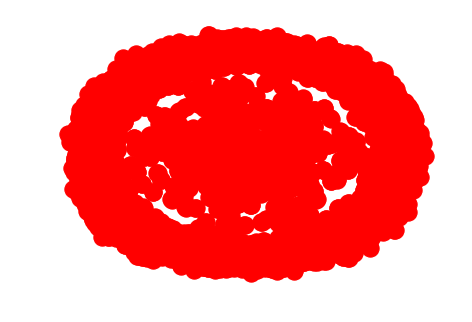

In [56]:
nx.draw(G)
#nx.draw(G,with_labels = True)
plt.show()
#plt.savefig("graph.pdf")

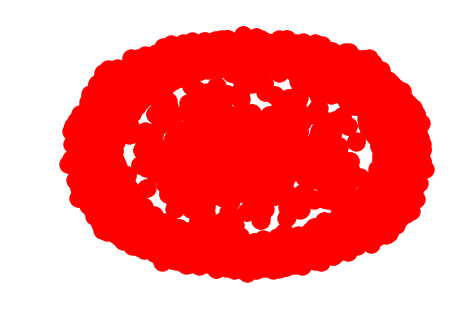

In [57]:
nx.draw(G, cmap = plt.get_cmap('jet'))
plt.show()

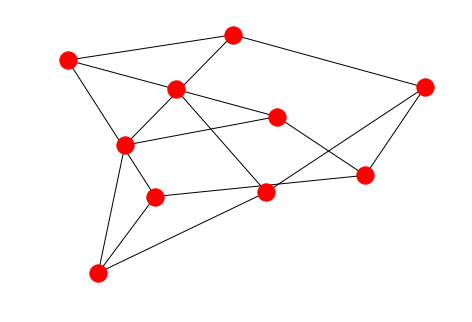

In [58]:
G2 = nx.petersen_graph(G)
nx.draw(G2)
plt.show()

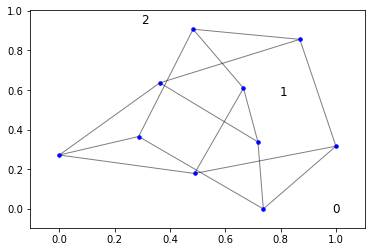

In [59]:
#pos = nx.spring_layout(g1,scale=2)
pos = nx.spring_layout(G)
graph_pos = nx.shell_layout(G)
#nx.draw_networkx_edges(g1, pos, font_size= 7, edge_color='red', arrows=True)
nx.draw_networkx_nodes(G,pos,node_color='b',alpha=1,node_size=12)
nx.draw_networkx_edges(G,pos,alpha=0.5)
nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')
plt.show()

In [ ]:
G.add_edges_from(mylist2)
G.edges()

In [ ]:
G.add_edges_from(mylist3)
print(nx.info(G))

In [ ]:
pp_json = df_2.to_json(orient='records')
pp_json

In [ ]:
print(pp_json)

In [ ]:
import collections

new_dict_2 = {'jurisdiction_description': str(df_2['jurisdiction_description']),
              'country_code': str(df_2['country_code']),
              'country': str(df_2['country']),
              'status': str(df_2['status']),
              'name': str(df_2['name']),
              'intermediary_name': str(df_2['intermediary_name']),
              'address': str(df_2['address'])
           }
new_dict_2 = collections.OrderedDict(new_dict_2)
new_dict_2

In [ ]:
new_dict_2['jurisdiction_description']

In [ ]:
G = nx.Graph()
G.add_node(new_dict_2['jurisdiction_description'])
G.nodes()

In [ ]:
G.add_edges_from(new_dict_2['jurisdiction_description'],new_dict_2['country_code'])
G.edges()

In [ ]:
nx.draw(G)
plt.show()

In [ ]:
#new_df = pd.DataFrame(new_dict)
#new_df.head(3)

In [ ]:
#new_df.info()

In [ ]:
print(nx.info(G))

In [ ]:
G.nodes()

In [ ]:
G.add_edges_from(country_dict,jurisdiction_dict)

Create a list based on the node_1 and node_2 available in the "all_edges" data set

In [ ]:
a1 = (a.node_1,a.node_2)

Print a sample record from the newly created list

In [ ]:
print(a1[0][6],a1[1][6])

Using a simple python loop create sets of edges from list a1 for entirety of data set

In [ ]:
g = nx.Graph()
i = 0
j = 0
k = 1

for j in range(len(a1[0])):
    g.add_edge(a1[i][j], a1[k][j])
    j = j+1


In [ ]:
print(nx.info(g))

In [ ]:
nx.degree_centrality(g)


In [ ]:
g1 = nx.Graph()
a, b = 0,0
c = 1

for j in range(1000):
    g1.add_edge(a1[a][b], a1[c][b])
    b = b+1

In [ ]:
print(nx.info(g1))

In [ ]:
nx.betweenness_centrality(g1)

In [ ]:
nx.draw(g1)
plt.show()


In [ ]:
nx.draw(g1, cmap = plt.get_cmap('jet'))
plt.show()

In [ ]:
g2 = nx.petersen_graph(g1)
nx.draw(g2)

In [ ]:
g3 = nx.karate_club_graph()
nx.draw(g3)

In [ ]:
#pos = nx.spring_layout(g1,scale=2)
pos = nx.spring_layout(g1)
#nx.draw_networkx_edges(g1, pos, font_size= 7, edge_color='red', arrows=True)
nx.draw_networkx_nodes(g1,pos,node_color='b',alpha=1,node_size=12)
nx.draw_networkx_edges(g1,pos,alpha=0.5)